# Convolutional Neural Networks - Handwriting 
Following some different tutorials based on the scikit-learn resources.

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

### A first glance at the dataset
The dataset is a dictionary-like object that contains the data as well as metainformation of it. Some of the members are `.data` and `.target` (if supervised learning). 

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

The data may be in a different shape then the original data - for example the images in the digits dataset. 

In [10]:
print("Image 1: \n", digits.images[0])
print("\nData 1: \n",digits.data[0])

Image 1: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Data 1: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


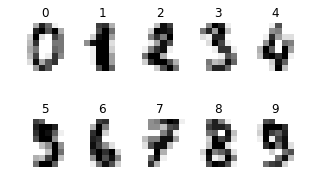

In [12]:
lables_and_images = list(zip(digits.images, digits.target))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(lables_and_images[:10]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

### Learning and predicting

Our goal is to predict what digit a given image represents. In this classification task there are 10 alternative classes (the numbers from 0 to 9). On these ten classes we fit an estimator (the rule for calculating an estimate of a given quantity based on observed data) so that we can predict what classes other images belong to. 

We will use SVC (support vector classification) as our estimator. Other options might be the random forest estimator. They differ in which algorithm they use.

In [11]:
# The SVC function takes in the params of the model - these are just placeholders for now.
clf = svm.SVC(gamma=0.001, C=100.)

The estimator is named `clf` as it is a classifier. It is still completely dumb: it will learn from the data when it is fit to it. The `fit` method takes in the training set (separated from the testing set) as a param. 

In [22]:
print("100% of the data is {}.".format(len(digits.data)))

100% of the data is 1797.


We want to use 80% of the data to train our classifier and the remaining 20% to test it. 

In [31]:
# Get 4/5
split_index = len(digits.data)//5*4  
print("80% of the data is {}.".format(split_index))

train_data = digits.data[:split_index]
test_data = digits.data[split_index:]

train_target = digits.target[:split_index]
test_target = digits.target[split_index:] 

# For double checking with human eyes
test_images = digits.images[split_index:]

80% of the data is 1436.


In [23]:
clf.fit(train_data, train_target) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

This modifies the classifier object so that it now can estimate the targets of new, given values. Let's test it!

In [27]:
clf.predict(test_data[10:20])


array([9, 5, 5, 6, 5, 0, 9, 8, 9, 8])

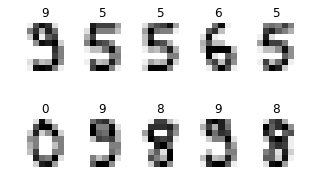

In [32]:
tested_lables_and_images = list(zip(test_images[10:20], test_target[10:20]))
plt.figure(figsize=(5,5))
for index, (image, label) in enumerate(tested_lables_and_images[:10]):
    plt.subplot(3, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('{}'.format(label))